# Load and explore the data set

In [42]:
# Load dataset
import pandas as pd
data = pd.read_csv('ps2_available_dataset.csv')

# Have a quick look 
data.head()

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC
0,1,74,94.113373,non-female,negative,False,-11.035690,-0.336843,double,1,0
1,1,56,83.337745,non-female,negative,False,-3.982345,-0.018734,none,1,1
2,0,37,81.759240,female,negative,False,6.205701,0.147933,double,1,1
3,1,54,88.549518,female,negative,False,-1.827613,-0.338373,none,1,1
4,0,73,82.171555,female,negative,NaN,-14.637389,-0.369325,none,1,1


In [43]:
# Check variable type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   treatment       10000 non-null  int64  
 1   age             10000 non-null  int64  
 2   blood_pressure  10000 non-null  float64
 3   gender          10000 non-null  object 
 4   blood_test      10000 non-null  object 
 5   family_history  7068 non-null   object 
 6   MeasureA        10000 non-null  float64
 7   TestB           10000 non-null  float64
 8   GeneA           10000 non-null  object 
 9   GeneB           10000 non-null  int64  
 10  GeneC           10000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 859.5+ KB


### Notice: 
Family_history has many null values


# Dealing with missing values

1. First, we need to find whether these null values are Missing Completely at Random (MCAR)

In [97]:
# Select the lines that have missing values
missing_data = data[pd.isnull(data["family_history"])]
missing_data.shape

(2932, 11)

2. Find whether missing values are correlated with any object feature

In [98]:
# Count values of each object and sort them from small to big

mis_cat_cols = missing_data.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    missing_data[mis_cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))  

counts
column     value             
GeneA      single         600
           double        1022
           none          1310
blood_test positive       293
           negative      2639
gender     non-female    1101
           female        1831

In [99]:
# Count values of each object and sort them from small to big

cat_cols = data.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    data[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))  

counts
column         value             
GeneA          single        2039
               double        3479
               none          4482
blood_test     positive       933
               negative      9067
family_history True           100
               False         6968
gender         non-female    3638
               female        6362

This shows missing values are not correlated with any object feature, because the proporation are roughly the same.

3. Find out whether missing values are correlated with numerical features

In [100]:
data.describe()

,treatment,age,blood_pressure,MeasureA,TestB,GeneB,GeneC
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.358700,60.032800,84.642355,-5.992414,0.004466,0.547900,0.550400
std,0.479643,8.106546,5.266045,4.168837,0.322338,0.497725,0.497478
min,0.000000,29.000000,-99.000000,-21.708000,-0.564197,0.000000,0.000000
25%,0.000000,55.000000,82.314030,-8.790691,-0.251337,0.000000,0.000000
50%,0.000000,60.000000,83.997305,-5.956422,-0.039662,1.000000,1.000000
75%,1.000000,66.000000,86.342954,-3.217110,0.215928,1.000000,1.000000
max,1.000000,92.000000,107.595583,8.889658,1.231447,1.000000,1.000000


In [101]:
missing_data.describe()

,treatment,age,blood_pressure,MeasureA,TestB,GeneB,GeneC
count,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000
mean,0.373465,60.294679,84.642901,-6.107058,0.007939,0.541610,0.544338
std,0.483807,8.067131,5.857660,4.187206,0.326233,0.498351,0.498115
min,0.000000,29.000000,-99.000000,-20.974268,-0.564197,0.000000,0.000000
25%,0.000000,55.000000,82.250769,-8.904374,-0.244389,0.000000,0.000000
50%,0.000000,60.000000,84.070302,-6.108696,-0.044438,1.000000,1.000000
75%,1.000000,66.000000,86.438061,-3.346114,0.220864,1.000000,1.000000
max,1.000000,87.000000,103.197261,8.889658,1.231447,1.000000,1.000000


Because the mean and variance are roughtly the same, the missing values are also not correlated with numerical features.

4. So far, we can know that missing values are Missing Completely at Random (MCAR). Therefore, I choose to simply delete those lines that have missing values.

In [44]:
# Delete lines that have missing values
data = data.dropna()
data.shape

(7068, 11)

# Explore data set 

In [103]:
# Count frequency of each object and sort them from small to big

cat_cols = data.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    data[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))  

counts
column         value             
GeneA          single        1439
               double        2457
               none          3172
blood_test     positive       640
               negative      6428
family_history True           100
               False         6968
gender         non-female    2537
               female        4531

### Notice:
1. Blood_test and family_history are imbalanced.


2. Feature engineering ideas:
    
    a) blood_test, family_history, and gender: create dummy variables
    
    b) GeneA: use one-hot encoding

In [45]:
# See whether the target value is balanced
data['treatment'].value_counts()

0    4576
1    2492
Name: treatment, dtype: int64

### Notice:
Our target value is balanced.

# Correlations

### Check whether each categorical data affect target value 

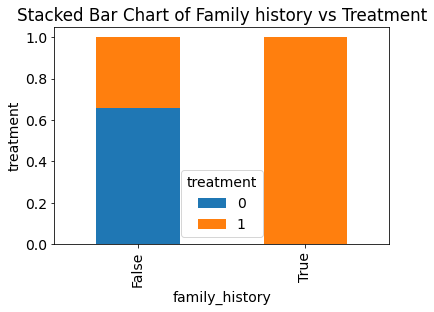

In [105]:
# Check whether Family history affect Treatment

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

table=pd.crosstab(data.family_history,data.treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Family history vs Treatment')
plt.xlabel('family_history')
plt.ylabel('treatment')
plt.savefig('fa_his_vs_treatment')

## IMPORTANT Finding:
We should delete this feature 

In [46]:
# Delete feature: family_history
data = data.drop("family_history", axis=1)
data.head()

,treatment,age,blood_pressure,gender,blood_test,MeasureA,TestB,GeneA,GeneB,GeneC
0,1,74,94.113373,non-female,negative,-11.035690,-0.336843,double,1,0
1,1,56,83.337745,non-female,negative,-3.982345,-0.018734,none,1,1
2,0,37,81.759240,female,negative,6.205701,0.147933,double,1,1
3,1,54,88.549518,female,negative,-1.827613,-0.338373,none,1,1
5,0,52,81.778809,female,negative,-2.034462,-0.040692,none,1,0


Text(0, 0.5, 'treatment')

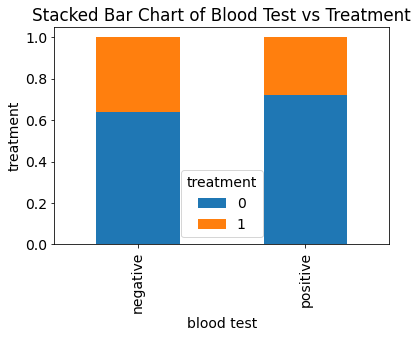

In [47]:
# Check whether Blood Test affect Treatment

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

table=pd.crosstab(data.blood_test,data.treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Blood Test vs Treatment')
plt.xlabel('blood test')
plt.ylabel('treatment')

### Finding:
Blood test has little relationship with target value

Text(0, 0.5, 'treatment')

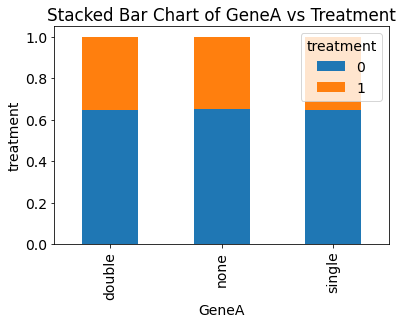

In [48]:
# Check whether GeneA affect Treatment

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

table=pd.crosstab(data.GeneA,data.treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of GeneA vs Treatment')
plt.xlabel('GeneA')
plt.ylabel('treatment')

### Finding:
GeneA has little relationship with target value

Text(0, 0.5, 'treatment')

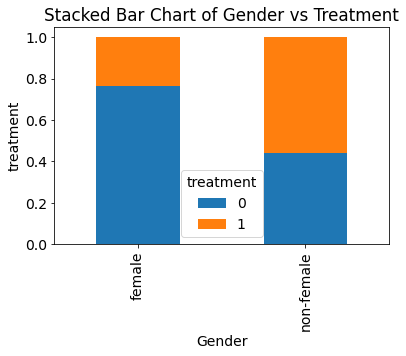

In [49]:
# Check whether gender affect Treatment

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

table=pd.crosstab(data.gender,data.treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs Treatment')
plt.xlabel('Gender')
plt.ylabel('treatment')

### Important Finding:
Gender do affect target value

### Conclusion:
Variable that won't influence target value: GeneA
We should delete GeneA

In [25]:
data.head()

,treatment,age,blood_pressure,MeasureA,TestB,GeneB,GeneC,blood_test_negative,blood_test_positive,gender_female,gender_non-female,GeneA_double,GeneA_none,GeneA_single
0,1,74,94.113373,-11.035690,-0.336843,1,0,1,0,0,1,1,0,0
1,1,56,83.337745,-3.982345,-0.018734,1,1,1,0,0,1,0,1,0
2,0,37,81.759240,6.205701,0.147933,1,1,1,0,1,0,1,0,0
3,1,54,88.549518,-1.827613,-0.338373,1,1,1,0,1,0,0,1,0
5,0,52,81.778809,-2.034462,-0.040692,1,0,1,0,1,0,0,1,0


In [47]:
# Delete feature: GeneA
data = data.drop("GeneA", axis=1)
data.head()

,treatment,age,blood_pressure,gender,blood_test,MeasureA,TestB,GeneB,GeneC
0,1,74,94.113373,non-female,negative,-11.035690,-0.336843,1,0
1,1,56,83.337745,non-female,negative,-3.982345,-0.018734,1,1
2,0,37,81.759240,female,negative,6.205701,0.147933,1,1
3,1,54,88.549518,female,negative,-1.827613,-0.338373,1,1
5,0,52,81.778809,female,negative,-2.034462,-0.040692,1,0


### Check correlation between other variables and target value

In [48]:
data.corr()["treatment"]

treatment         1.000000
age              -0.147294
blood_pressure    0.061725
MeasureA          0.142355
TestB             0.042063
GeneB             0.029843
GeneC             0.041178
Name: treatment, dtype: float64

### Finding:
Other variables won't affect target values

### Check correlation between variables

In [51]:
data.corr()

,treatment,age,blood_pressure,MeasureA,TestB,GeneB,GeneC
treatment,1.000000,-0.147294,0.061725,0.142355,0.042063,0.029843,0.041178
age,-0.147294,1.000000,0.004066,-0.970944,0.002526,0.023575,0.006706
blood_pressure,0.061725,0.004066,1.000000,-0.002923,0.000959,0.005439,-0.009015
MeasureA,0.142355,-0.970944,-0.002923,1.000000,-0.001578,-0.024170,-0.005822
TestB,0.042063,0.002526,0.000959,-0.001578,1.000000,-0.021551,0.014354
GeneB,0.029843,0.023575,0.005439,-0.024170,-0.021551,1.000000,-0.013953
GeneC,0.041178,0.006706,-0.009015,-0.005822,0.014354,-0.013953,1.000000


## Important Finding:
There is strong correlation between Measure A and age. I decide to use regularization to deal with it.

# Preprocessing

## Handing Categorical Attributes

In [52]:
data.head()

,treatment,age,blood_pressure,gender,blood_test,MeasureA,TestB,GeneA,GeneB,GeneC
0,1,74,94.113373,non-female,negative,-11.035690,-0.336843,double,1,0
1,1,56,83.337745,non-female,negative,-3.982345,-0.018734,none,1,1
2,0,37,81.759240,female,negative,6.205701,0.147933,double,1,1
3,1,54,88.549518,female,negative,-1.827613,-0.338373,none,1,1
5,0,52,81.778809,female,negative,-2.034462,-0.040692,none,1,0


1. Create dummy variables for blood_test, family_history, and gender 
2. Encode GeneA as one-hot vectors

In [49]:
# Create dummy variable and one-hot encoding
cat_var = data.select_dtypes(include=object).columns.tolist()
for var in cat_var:
    data=pd.concat([data,pd.get_dummies(data[var],prefix=var)],axis=1).drop([var],axis=1)

In [50]:
data.head()

,treatment,age,blood_pressure,MeasureA,TestB,GeneB,GeneC,gender_female,gender_non-female,blood_test_negative,blood_test_positive
0,1,74,94.113373,-11.035690,-0.336843,1,0,0,1,1,0
1,1,56,83.337745,-3.982345,-0.018734,1,1,0,1,1,0
2,0,37,81.759240,6.205701,0.147933,1,1,1,0,1,0
3,1,54,88.549518,-1.827613,-0.338373,1,1,1,0,1,0
5,0,52,81.778809,-2.034462,-0.040692,1,0,1,0,1,0


In [55]:
data.corr()

,treatment,age,blood_pressure,MeasureA,TestB,GeneB,GeneC,blood_test_negative,blood_test_positive,gender_female,gender_non-female,GeneA_double,GeneA_none,GeneA_single
treatment,1.000000,-0.147294,0.061725,0.142355,0.042063,0.029843,0.041178,0.050201,-0.050201,-0.321952,0.321952,0.001693,-0.003791,0.002680
age,-0.147294,1.000000,0.004066,-0.970944,0.002526,0.023575,0.006706,0.014782,-0.014782,-0.008913,0.008913,0.009707,-0.008318,-0.001206
blood_pressure,0.061725,0.004066,1.000000,-0.002923,0.000959,0.005439,-0.009015,0.006774,-0.006774,-0.014412,0.014412,0.014292,-0.008042,-0.006968
MeasureA,0.142355,-0.970944,-0.002923,1.000000,-0.001578,-0.024170,-0.005822,-0.017416,0.017416,0.011381,-0.011381,-0.006317,0.008270,-0.002744
TestB,0.042063,0.002526,0.000959,-0.001578,1.000000,-0.021551,0.014354,0.012629,-0.012629,0.026275,-0.026275,-0.001008,-0.004462,0.006703
GeneB,0.029843,0.023575,0.005439,-0.024170,-0.021551,1.000000,-0.013953,0.000323,-0.000323,0.008089,-0.008089,-0.006929,0.009026,-0.002955
GeneC,0.041178,0.006706,-0.009015,-0.005822,0.014354,-0.013953,1.000000,0.019699,-0.019699,0.010526,-0.010526,0.007463,0.006954,-0.017416
blood_test_negative,0.050201,0.014782,0.006774,-0.017416,0.012629,0.000323,0.019699,1.000000,-1.000000,0.012619,-0.012619,-0.021246,0.007158,0.016284
blood_test_positive,-0.050201,-0.014782,-0.006774,0.017416,-0.012629,-0.000323,-0.019699,-1.000000,1.000000,-0.012619,0.012619,0.021246,-0.007158,-0.016284
gender_female,-0.321952,-0.008913,-0.014412,0.011381,0.026275,0.008089,0.010526,0.012619,-0.012619,1.000000,-1.000000,-0.014295,0.008636,0.006239


## Split X and y

In [51]:
y = data["treatment"]
X = data.drop("treatment", axis=1)

In [52]:
X.shape

(7068, 10)

# Feature selection

In [58]:
data_copy = data
X_copy = X
y_copy = y

In [59]:
# Using RFE to get the ranking of the importance of each feature
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X, y)
selector.ranking_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

array([11, 12, 13,  4,  7,  6,  5,  3,  2,  1,  9, 10,  8])

In [60]:
X.head()

,age,blood_pressure,MeasureA,TestB,GeneB,GeneC,blood_test_negative,blood_test_positive,gender_female,gender_non-female,GeneA_double,GeneA_none,GeneA_single
0,74,94.113373,-11.035690,-0.336843,1,0,1,0,0,1,1,0,0
1,56,83.337745,-3.982345,-0.018734,1,1,1,0,0,1,0,1,0
2,37,81.759240,6.205701,0.147933,1,1,1,0,1,0,1,0,0
3,54,88.549518,-1.827613,-0.338373,1,1,1,0,1,0,0,1,0
5,52,81.778809,-2.034462,-0.040692,1,0,1,0,1,0,0,1,0


In [61]:
# Print in a more understandable way
for ele in selector.ranking_:
    print("{}:{}".format(X.columns[ele-1], ele))

GeneA_double:11
GeneA_none:12
GeneA_single:13
TestB:4
blood_test_negative:7
GeneC:6
GeneB:5
MeasureA:3
blood_pressure:2
age:1
gender_female:9
gender_non-female:10
blood_test_positive:8


# Training, Validation, and Test Set

In [62]:
# # Create randam indices
# import numpy as np
# np.random.seed(44)
# N = len(data)
# shuffled_indices = np.random.permutation(N)

# # Split indices into train, validation and test sets
# train_indices = shuffled_indices[:int(N*0.6)]
# valid_indices = shuffled_indices[int(N*0.6):int(N*0.8)]
# test_indices = shuffled_indices[int(N*0.8):]

# # Split data into train, validation and test sets
# train_set = data.iloc[train_indices]
# valid_set = data.iloc[valid_indices]
# test_set = data.iloc[test_indices]

# train_set.shape, valid_set.shape, test_set.shape

((4240, 14), (1414, 14), (1414, 14))

In [53]:
# Use this code indeed
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

## Split X and y of train, validation and test sets

In [63]:
# # Split train set
# train_y = train_set["treatment"]
# train_X = train_set.drop("treatment", axis=1)

# # Split validation set
# valid_y = valid_set["treatment"]
# valid_X = valid_set.drop("treatment", axis=1)

# # Split test set
# test_y = test_set["treatment"]
# test_X = test_set.drop("treatment", axis=1)

## Train

In [54]:
# Using statsmodel to train the model
import statsmodels.api as sm
logit_model=sm.Logit(train_y,train_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.580303
         Iterations 10
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.104      
Dependent Variable:  treatment        AIC:              5759.5199  
Date:                2021-03-11 21:22 BIC:              5818.0787  
No. Observations:    4947             Log-Likelihood:   -2870.8    
Df Model:            8                LL-Null:          -3203.9    
Df Residuals:        4938             LLR p-value:      1.3264e-138
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      10.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
age                 -0.0583   0.0165 -3.5314 0.0004 -0.0907 -0.0260
blood_pressure       0.0473   0.0098  4.

## Logistic Regression Model Fitting

In [8]:
# Fit model on the training set
logreg = LogisticRegression(penalty='none')
logreg.fit(train_X, train_y)

NameError: name 'LogisticRegression' is not defined

In [66]:
logreg.intercept_, logreg.coef_

(array([-0.17967206]),
 array([[-0.07894706,  0.04660186, -0.05909161,  0.30983537,  0.23211097,
          0.25668041,  0.07519627, -0.25486833, -0.80308074,  0.62340868,
         -0.04548967, -0.12560521, -0.00857718]]))

## Evaluating on the Validation Set

In [11]:
# Define a new evalation function
def log_eva(X, y, M):
    """M means the model used"""
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
    
    pred_y = M.predict(X)
    
    # Calculate accuracy
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(M.score(X, y)))
    
    # Calculate confusion matrix
    c_mat = confusion_matrix(y, pred_y)
    print('Confusion matrix is')
    print(c_mat)
    
    # Compute precision score
    print("Precision score is:{}".format(precision_score(y, pred_y)))
    
    # Compute recall score
    print("Recall score is:{}".format(recall_score(y, pred_y)))
    
    # Compute f1 score
    print("F1 score is:{}".format(f1_score(y, pred_y)))

In [90]:
log_eva(valid_X, valid_y, logreg)

Accuracy of logistic regression classifier on test set: 0.71
Confusion matrix is
[[785 148]
 [260 221]]
Precision score is:0.5989159891598916
Recall score is:0.4594594594594595
F1 score is:0.52


## Fitting model using penalty

In [55]:
from sklearn.linear_model import LogisticRegression
# L1 penalty
logreg_L1 = LogisticRegression(penalty='l1', solver='liblinear')
logreg_L1.fit(train_X, train_y)

# # L2 penalty
# logreg_L2 = LogisticRegression(penalty='l2')
# logreg_L2.fit(train_X, train_y)

LogisticRegression(penalty='l1', solver='liblinear')

In [56]:
logreg_L1.intercept_, logreg_L1.coef_

(array([0.]),
 array([[-0.06330119,  0.04313463, -0.03371975,  0.34265866,  0.15098848,
          0.21797572, -1.42665522,  0.        ,  0.        , -0.46825316]]))

In [71]:
logreg_L2.intercept_, logreg_L2.coef_

(array([-0.33779614]),
 array([[-0.07595823,  0.04868875, -0.05299536,  0.35797499,  0.24684172,
          0.26757606,  0.03052101, -0.35879705, -0.88056087,  0.55228483,
         -0.1010963 , -0.18066588, -0.04651386]]))

## Evaluating model using validation set after using penalty L1

In [40]:
log_eva(test_X, test_y, logreg_L1)

Accuracy of logistic regression classifier on test set: 0.71
Confusion matrix is
[[1174  188]
 [ 417  342]]
Precision score is:0.6452830188679245
Recall score is:0.4505928853754941
F1 score is:0.530643910007758


## Evaluating model using validation set after using penalty L2

In [92]:
log_eva(valid_X, valid_y, logreg_L2)

Accuracy of logistic regression classifier on test set: 0.71
Confusion matrix is
[[789 144]
 [259 222]]
Precision score is:0.6065573770491803
Recall score is:0.46153846153846156
F1 score is:0.5242030696576151


### Conclusion:
Adding L1 regularization to my model increases the interprebality of our model, since it let the coefficient before useless variable become zero. But it won't improve the model. 

# Train for Real

In [74]:
# Combine the train set and the validation set
train_an_valid_X = train_X.append(valid_X)
train_an_valid_y = train_y.append(valid_y)

train_an_valid_X.shape, train_an_valid_y.shape

((5654, 13), (5654,))

In [75]:
# fit the model using L1 penalty
logreg_L1.fit(train_an_valid_X, train_an_valid_y)

LogisticRegression(penalty='l1', solver='liblinear')

# Test for Real

In [93]:
# Check the performance
log_eva(test_X, test_y, logreg_L1)

Accuracy of logistic regression classifier on test set: 0.71
Confusion matrix is
[[790 131]
 [273 220]]
Precision score is:0.6267806267806267
Recall score is:0.4462474645030426
F1 score is:0.5213270142180094


## ROC Curve

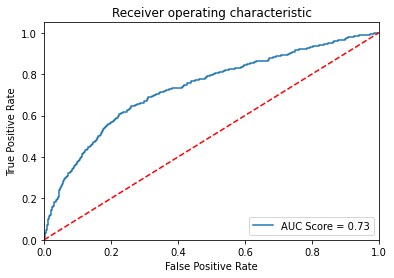

In [41]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(test_y, logreg_L1.predict_proba(test_X)[:,1])
plt.figure()
# Compute AUC score
plt.plot(fpr, tpr, label='AUC Score = %0.2f' % metrics.auc(fpr,tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Over-sampling

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['treatment'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['treatment']==0]))
print("Number of subscription",len(os_data_y[os_data_y['treatment']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['treatment']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['treatment']==1])/len(os_data_X))

length of oversampled data is  6428
Number of no subscription in oversampled data 3214
Number of subscription 3214
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [19]:
train_X, test_X, train_y, test_y = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
# L1 penalty
logreg_L1 = LogisticRegression(penalty='l1', solver='liblinear')
logreg_L1.fit(train_X, train_y)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(penalty='l1', solver='liblinear')

In [21]:
# Evaluate on validation set
log_eva(test_X, test_y, logreg_L1)

Accuracy of logistic regression classifier on test set: 0.70
Confusion matrix is
[[712 208]
 [367 642]]
Precision score is:0.7552941176470588
Recall score is:0.6362735381565907
F1 score is:0.6906939214631522


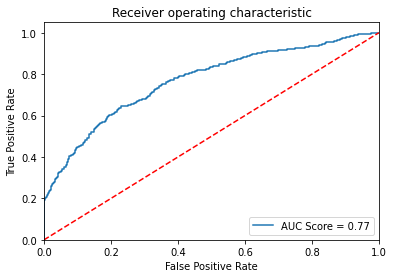

In [22]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(test_y, logreg_L1.predict_proba(test_X)[:,1])
plt.figure()
# Compute AUC score
plt.plot(fpr, tpr, label='AUC Score = %0.2f' % metrics.auc(fpr,tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Another question:
will delete those variable cause improvement of AUC score?